# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-ngc_20.03_v0-nccl-n1/  gpu-v1.5.0-gloo-n2/   gpu-v1.5.0-nccl-n2/
gpu-v1.1.0-nccl-n1/        gpu-v1.5.0-gloo-n32/  gpu-v1.5.0-nccl-n32/
gpu-v1.2.0-nccl-n1/        gpu-v1.5.0-gloo-n4/   gpu-v1.5.0-nccl-n4/
gpu-v1.3.1-nccl-n1/        gpu-v1.5.0-gloo-n64/  gpu-v1.5.0-nccl-n64/
gpu-v1.4.0-nccl-n1/        gpu-v1.5.0-gloo-n8/   gpu-v1.5.0-nccl-n8/
gpu-v1.5.0-gloo-n1/        gpu-v1.5.0-nccl-n1/   hsw-v1.5.0-mpi-n1/
gpu-v1.5.0-gloo-n16/       gpu-v1.5.0-nccl-n16/  knl-v1.5.0-mpi-n1/


In [6]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.5.0-mpi-n1/results.txt']

In [6]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,backend,model
0,627.266843,1936.923361,1,hsw,v1.4.0,mpi,lstm
1,203.579070,849.929892,1,hsw,v1.4.0,mpi,alexnet
2,14.873055,34.675494,1,hsw,v1.4.0,mpi,resnet50
3,115.603731,228.013513,1,hsw,v1.4.0,mpi,cnn3d
4,642.970956,2556.861520,1,hsw,v1.3.1,mpi,lstm
5,204.135253,606.233518,1,hsw,v1.3.1,mpi,alexnet
6,15.196844,29.728784,1,hsw,v1.3.1,mpi,resnet50
7,201.667720,407.555616,1,hsw,v1.3.1,mpi,cnn3d
8,776.840712,2576.349997,1,hsw,v1.1.0,mpi,lstm
9,170.298037,689.007436,1,hsw,v1.1.0,mpi,alexnet


## Training throughput comparisons

In [7]:
models = results.model.unique()

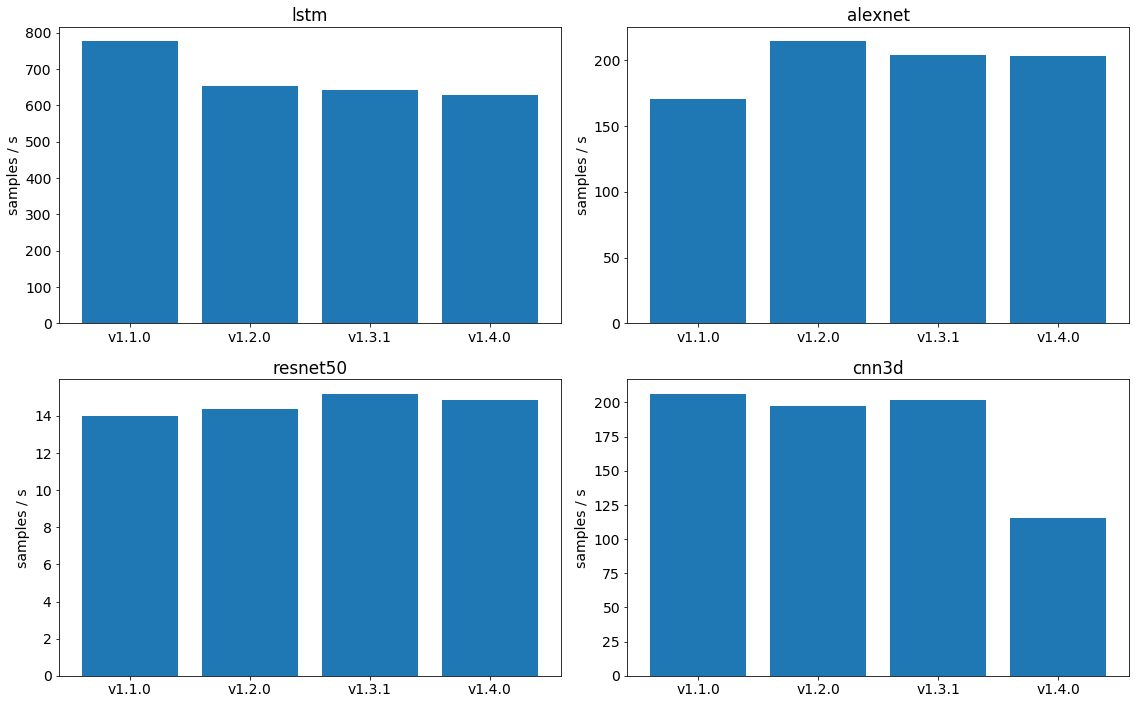

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

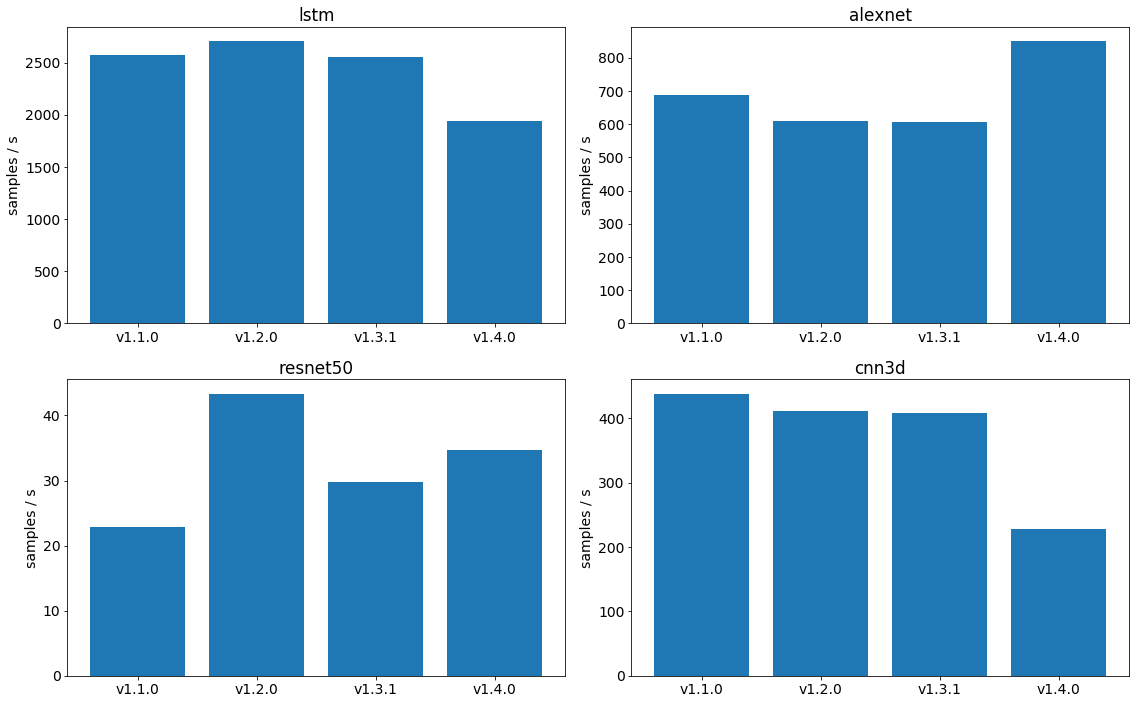

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()